# Análisis Exploratorio de Datos (EDA) 

### Introducción
El Análisis Exploratorio de Datos (EDA) es una fase crucial en cualquier proyecto de análisis de datos. En esta etapa, se busca identificar patrones, tendencias y relaciones entre las variables que puedan proporcionar información valiosa. En el contexto de nuestro proyecto, nos centraremos en el conjunto de datos llamado `homicidios_final.csv` (output del notebook ETL.ipynb) y `lesiones_final.csv`.
### Objetivo
El objetivo principal de este EDA es explorar la estructura y características del conjunto de datos y documentar su análisis. Algunos de los aspectos clave que exploraremos incluyen: *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados, visualizaciones para cada variable (cualitativa y cuantitativa), entre otros*. Estos pasos permitirán obtener una visión detallada y completa de los datos, proporcionando así una base sólida para entender los datos.

    A lo largo de este Notebook se tiene en cuenta el objetivo del proyecto que es genererar información valiosa que ayude a las autoridades locales de la Ciudad Autónoma de Buenos Aires a tomar medidas para disminuir la cantidad de víctimas fatales en siniestros viales.

### Contenido:
1. Carga de datos
2. Análisis

    2.1 Análisis dataframe homicidios

    2.2 Análisis dataframe lesiones (opcional)

--- 

### 1. Carga de datos

LIBRERÍAS

In [1]:
#pip install matplotlib
#pip install pandas
# pip install folium

import pandas as pd
import matplotlib.pyplot as plt # Librería para visualización de datos
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [2]:
df_homicidios = pd.read_csv("homicidios_final.csv")
df_lesiones= pd.read_csv("lesiones_final.csv")

### 2. Análisis

Vemos el tamaño de los dataframes

In [75]:
print("Homicidios:",df_homicidios.shape)
print("Lesiones:",df_lesiones.shape)

Homicidios: (717, 14)
Lesiones: (27602, 18)


### 2.1 Análisis - dataframe homicidios

In [76]:
df_homicidios.head(2)

,ID_siniestro,Nro_victimas,Fecha,Franja_horaria,Tipo_calle,Comuna,Longitud,Latitud,Vehiculo_Victima,Vehiculo_Acusado,Rol_vehiculo,Sexo,Edad,gravedad
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,FATAL
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,FATAL


Observamos un resumen del dataframe

In [77]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_siniestro      717 non-null    object 
 1   Nro_victimas      717 non-null    int64  
 2   Fecha             717 non-null    object 
 3   Franja_horaria    716 non-null    float64
 4   Tipo_calle        717 non-null    object 
 5   Comuna            717 non-null    int64  
 6   Longitud          717 non-null    float64
 7   Latitud           717 non-null    float64
 8   Vehiculo_Victima  708 non-null    object 
 9   Vehiculo_Acusado  694 non-null    object 
 10  Rol_vehiculo      706 non-null    object 
 11  Sexo              711 non-null    object 
 12  Edad              664 non-null    float64
 13  gravedad          717 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 78.6+ KB


- Datos Faltantes: Algunas columnas tienen valores nulos (NaN) en algunas filas. Por ejemplo, 'Franja_horaria', 'Vehiculo_Victima', 'Vehiculo_Acusado', 'Rol_vehiculo', 'Sexo' y 'Edad'.

- Tipos de Datos:
Se tienen tipos de datos por default para varias columnas que no se ajustan a lo que queremos, se asignará su correcto tipo como la categorización, lo cual es una buena práctica, especialmente cuando tenemos un conjunto limitado de categorías únicas.

Hacemos la conversión de las variables ya que las variables no responden a la naturaleza de lo que representan. 


In [78]:
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])
df_homicidios['Franja_horaria'] = pd.to_numeric(df_homicidios['Franja_horaria'], errors='coerce').astype('Int64')
df_homicidios['Edad'] = pd.to_numeric(df_homicidios['Edad'], errors='coerce').astype('Int64')
df_homicidios['Tipo_calle'] = df_homicidios['Tipo_calle'].astype('category')
df_homicidios['Comuna'] = df_homicidios['Comuna'].astype('category')
df_homicidios['Vehiculo_Victima'] =df_homicidios['Vehiculo_Victima'].astype('category')
df_homicidios['Vehiculo_Acusado'] =df_homicidios['Vehiculo_Acusado'].astype('category')
df_homicidios['Rol_vehiculo'] =df_homicidios['Rol_vehiculo'].astype('category')
df_homicidios['Sexo'] =df_homicidios['Sexo'].astype('category')
df_homicidios['gravedad'] =df_homicidios['gravedad'].astype('category')

#### a) Valores faltantes o nulos - Homicidios

In [79]:
# Homicidios

nulos_por_columna = df_homicidios.isnull().sum()# Obtener la cantidad de valores nulos por columna
porcentaje_nulos_por_columna = (nulos_por_columna / len(df_homicidios)) * 100

df_info_nulos = pd.DataFrame({
    'Nulos': nulos_por_columna,
    'Total': len(df_homicidios),'% Nulos': round(porcentaje_nulos_por_columna,2)
})
df_info_nulos

,Nulos,Total,% Nulos
ID_siniestro,0,717,0.00
Nro_victimas,0,717,0.00
Fecha,0,717,0.00
Franja_horaria,1,717,0.14
Tipo_calle,0,717,0.00
Comuna,0,717,0.00
Longitud,0,717,0.00
Latitud,0,717,0.00
Vehiculo_Victima,9,717,1.26
Vehiculo_Acusado,23,717,3.21


La presencia de nulos en el dataframe es muy baja, no pasa el 7.4% de representatividad de todo el dataframe.

#### b) Análisis descriptivo - Homicidios

Variables cuantitativas

In [94]:
df_homicidios[['Nro_victimas','Franja_horaria','Edad']].describe() # Medidas de tendencia central

,Nro_victimas,Franja_horaria,Edad
count,717.000000,716.0,664.0
mean,1.061367,11.554469,42.167169
std,0.257024,6.700055,19.788034
min,1.000000,0.0,1.0
25%,1.000000,6.0,27.0
50%,1.000000,11.0,37.0
75%,1.000000,17.0,56.25
max,3.000000,23.0,95.0


* El promedio de edad de las víctimas al momento del siniestro es de 42 años, con un mínimo de 1 año y un máximo de 95 años. Por otro lado, el número máximo de víctimas resgistrado es de 3 años y la mayor cantidad de siniestros resultan en una víctima fatal. Recordar que los datos son de un periodo del 2016 al 2021. También podemos observar que la franja horaria en el cual ocurren más siniestros es en promedio las 11 am.

Variables cualitativas

Se grafican algunas de las variables y así observar su distribución por categorías.

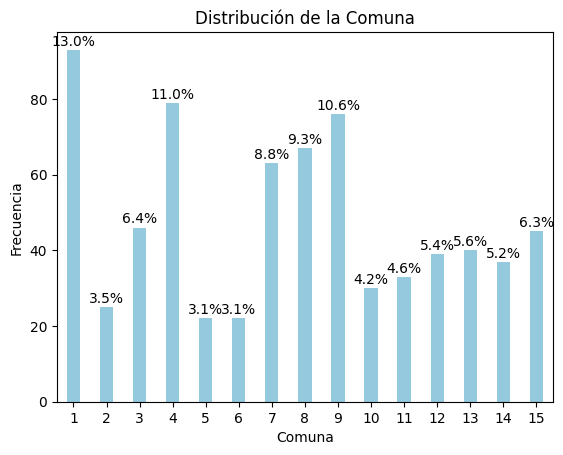

In [123]:
# Gráfico de barras para la distribución de la columna 'Comuna'
g = sns.countplot(x='Comuna', data=df_homicidios, color =  'skyblue', width=0.4)

# Calcular porcentajes
total_entries = len(df_homicidios)
percentage_data = (df_homicidios['Comuna'].value_counts() / total_entries) * 100
# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height / total_entries * 100:.1f}%', # porcentaje de las barras
                xy=(p.get_x() + p.get_width() / 2, height), #ubica en el centro superior de cada barra
                xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

#g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')

plt.title('Distribución de la Comuna')
plt.ylabel('Frecuencia')
plt.show()

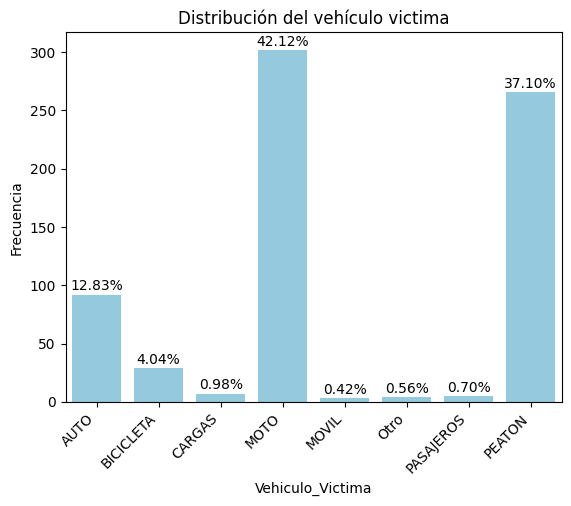

In [136]:
# Gráfico de barras para la distribución de la columna 'Vehiculo_Victima'
g = sns.countplot(x='Vehiculo_Victima', data=df_homicidios, color =  'skyblue')

# Calcular porcentajes
total_entries = len(df_homicidios)
percentage_data = (df_homicidios['Vehiculo_Victima'].value_counts() / total_entries) * 100
# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height / total_entries * 100:.2f}%', # porcentaje de las barras
                xy=(p.get_x() + p.get_width() / 2, height), #ubica en el centro superior de cada barra
                xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')

plt.title('Distribución del vehículo victima')
plt.ylabel('Frecuencia')
plt.show()

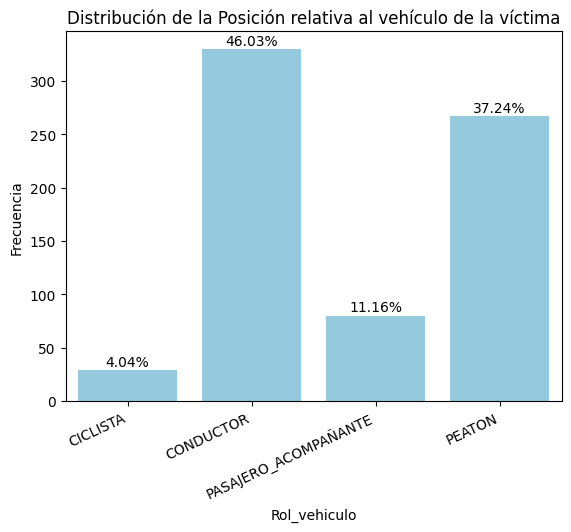

In [126]:
# Gráfico de barras para la distribución de la columna 'Rol_vehiculo'
g = sns.countplot(x='Rol_vehiculo', data=df_homicidios, color =  'skyblue')

# Calcular porcentajes
total_entries = len(df_homicidios)
percentage_data = (df_homicidios['Rol_vehiculo'].value_counts() / total_entries) * 100
# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height / total_entries * 100:.2f}%', # porcentaje de las barras
                xy=(p.get_x() + p.get_width() / 2, height), #ubica en el centro superior de cada barra
                xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

#
g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')

plt.title('Distribución de la Posición relativa al vehículo de la víctima')
plt.ylabel('Frecuencia')
plt.show()

* La posición de la víctima relativa al vehículo más común es 'Conductor', es decir que la víctima suele ser conductor.
* Las comunas con mayores siniestros registrados (>10%) son: 1,4 y 9. Nos brinda una visión general de lugares de la ciudad de buenos aires donde más ocurren accidentes y sugeriría prestar más atención.
* El vehículo que ocupaba la posición de víctima en su mayoría es 'MOTO' (42%) y 'peaton' (37%). Esto es relevante para nuestro posterior análisis.

#### c) Registros duplicados - Homicidios

In [149]:
# Identificar las filas duplicadas basadas en todas las columnas
duplicados = df_homicidios[df_homicidios.duplicated(keep=False, subset=None)]
duplicados

,ID_siniestro,Nro_victimas,Fecha,Franja_horaria,Tipo_calle,Comuna,Longitud,Latitud,Vehiculo_Victima,Vehiculo_Acusado,Rol_vehiculo,Sexo,Edad,gravedad


No hay filas completas duplicadas

In [153]:
# Identifica todas las filas duplicadas basadas en la columna 'ID_siniestro'
duplicados_id_siniestro = df_homicidios[df_homicidios.duplicated(subset=['ID_siniestro'], keep=False)]

# Ordena el DataFrame por 'ID_siniestro' para agrupar duplicados
duplicados_id_siniestro = duplicados_id_siniestro.sort_values(by='ID_siniestro')
print(duplicados_id_siniestro.shape)
duplicados_id_siniestro.head(4)

(41, 14)


,ID_siniestro,Nro_victimas,Fecha,Franja_horaria,Tipo_calle,Comuna,Longitud,Latitud,Vehiculo_Victima,Vehiculo_Acusado,Rol_vehiculo,Sexo,Edad,gravedad
29,2016-0041,2,2016-03-29,11,AVENIDA,7,-58.460766,-34.633504,MOTO,CARGAS,CONDUCTOR,MASCULINO,54,FATAL
30,2016-0041,2,2016-03-29,11,AVENIDA,7,-58.460766,-34.633504,MOTO,CARGAS,PASAJERO_ACOMPAÑANTE,MASCULINO,<NA>,FATAL
98,2016-0126,2,2016-09-18,22,CALLE,10,-58.525721,-34.621259,AUTO,CARGAS,CONDUCTOR,MASCULINO,37,FATAL
99,2016-0126,2,2016-09-18,22,CALLE,10,-58.525721,-34.621259,AUTO,CARGAS,PASAJERO_ACOMPAÑANTE,MASCULINO,60,FATAL


Hay ID_ siniestro duplicadas debido a que algunos siniestros registran más de una víctima.

#### d) Atípicos/extremos u outliers

Para dentificar outliers, se graficará un boxplot con las variables numéricas

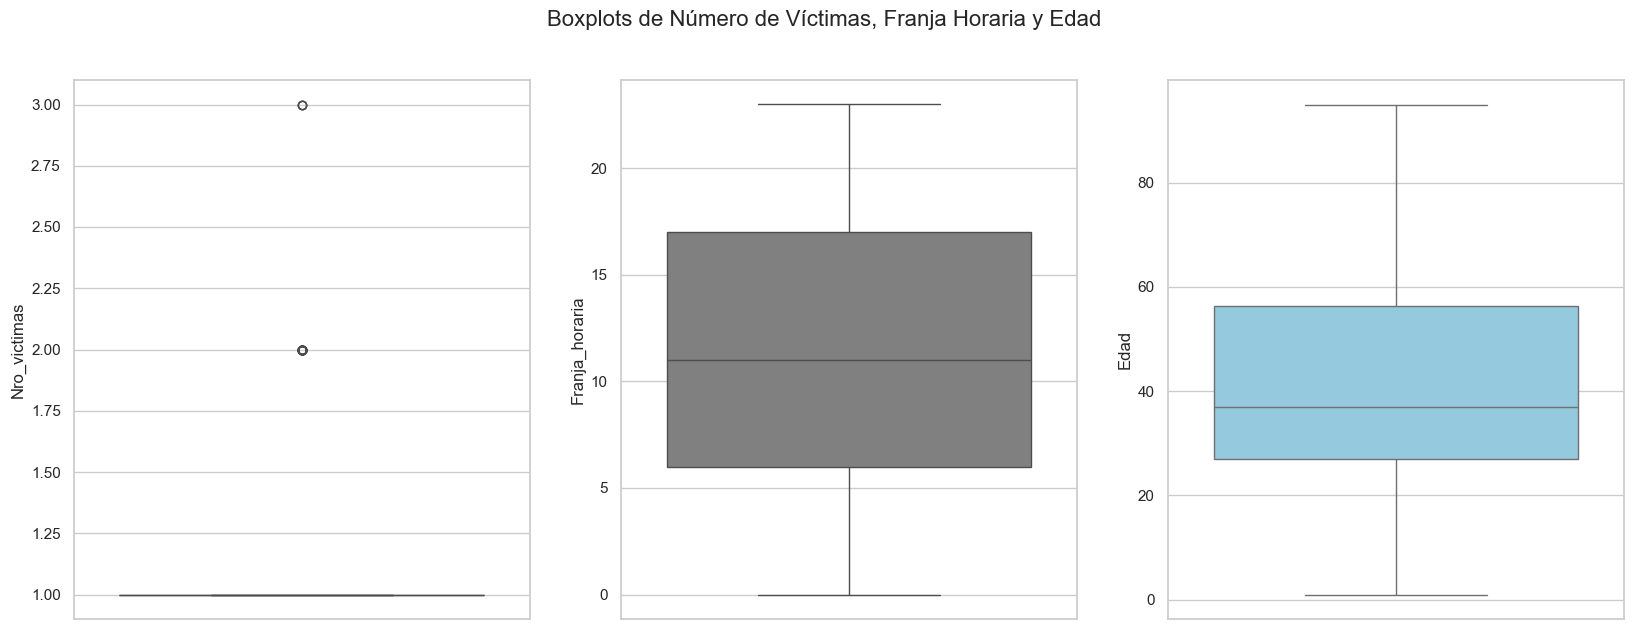

In [186]:
# Establecer el estilo de los gráficos de Seaborn en whitegrid
sns.set(style="whitegrid")

# Crear una figura con un tamaño específico
fig = plt.figure(figsize=(20, 7))

# Añadimos distintos ejes para cada uno de los gráficos porque cada variable tiene sus propias escalas
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Definir una paleta de colores para los boxplots usando el esquema de colores Set2
color_palette = sns.color_palette("Set2")

# Definir una lista de colores para cada boxplot
colors = ["blue", "gray", "skyblue"]

# Crear boxplots para cada variable especificada utilizando los colores proporcionados
sns.boxplot(data=df_homicidios, y="Nro_victimas", ax=ax1, color=colors[0])
sns.boxplot(data=df_homicidios, y="Franja_horaria", ax=ax2, color=colors[1])
sns.boxplot(data=df_homicidios, y="Edad", ax=ax3, color=colors[2])

# Agregar un título general a toda la figura
fig.suptitle('Boxplots de Número de Víctimas, Franja Horaria y Edad', fontsize=16)
plt.show()

No hay atípicos para la franja horaria ni edad. Con respecto al nro de victimas solo hay 3 valores para el nro de victimas fatales, como ya se vio anteriormente solo se registra 1, 2 o 3, y como la mayor cantidad de registros es 1 , el resto de valores se consideran outliers.

Opcional

Creamos columnas a partir de la fecha para analizarlo a más detalle, además contribuye a nuestro posterior análisis

In [188]:
# Crear nuevas columnas para día, mes, año, trimestre y semestre
df_homicidios['Mes'] = df_homicidios['Fecha'].dt.month
df_homicidios['Anio'] = df_homicidios['Fecha'].dt.year
df_homicidios['Trimestre'] = df_homicidios['Fecha'].dt.quarter
df_homicidios['Semestre'] = df_homicidios['Fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2) #2 semestres al año


**Comentario:** Mediante estos métodos de exploración podemos concluir que existen registros con valores faltantes, pero al ser una cantidad no representativa se trabajará sin problema. Para estos datos de homicidios, se encontraron duplicados en el ID_siniestro , pero es porque hay varias victimas en un mismo siniestro. Por otra parte, no hay valores que representen outliers, todos los valores de las categorías estan validadas como correctas. La variable de edad es consistente y muestra preocupación por la variabilidad de estos datos a pesar que se concentra en personas adultas. 

En este caso, dado que el objetivo se focaliza en buscar formas de disminuir los siniestros y que los registros incompletos representan una fracción muy menor del conjunto, se optará por mantenerlos y no perder el conteo de otras variables característicos de la víctima.

#### e) Análisis Exploratorio Bivariado
Se busca identificar gráficas interesantes buscando relaciones existentes al combinar variables

**Cantidad de siniestros por año**

Variables: ID_siniestro, Anio

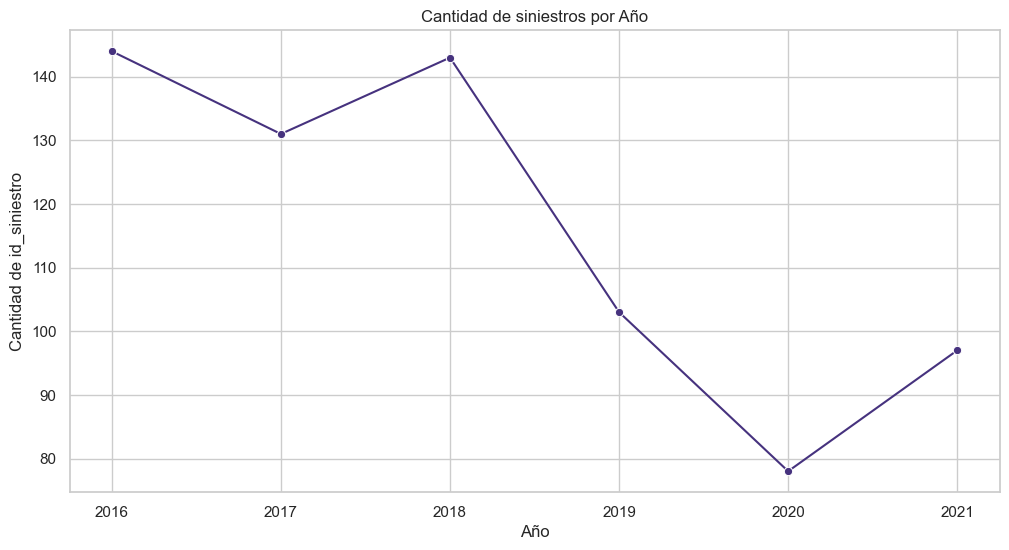

In [211]:
# Agrupa por año y cuenta la cantidad de id_siniestro
conteo_por_ano = df_homicidios.groupby('Anio')['ID_siniestro'].nunique().reset_index()

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Anio', y='ID_siniestro', data=conteo_por_ano, marker='o')
plt.title('Cantidad de siniestros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de id_siniestro')
plt.show()

* De forma general las estadísticas del 2029 al 2021 es muy variable con una baja pronunciada en el 2020, posiblemente por la temporada de pandemia en ese año. Podria considerarse un año atípico y no considerarse en el análisis.

**Siniestros según franja horaria por año**

Variables: ID_siniestro, Franja_horaria, Anio

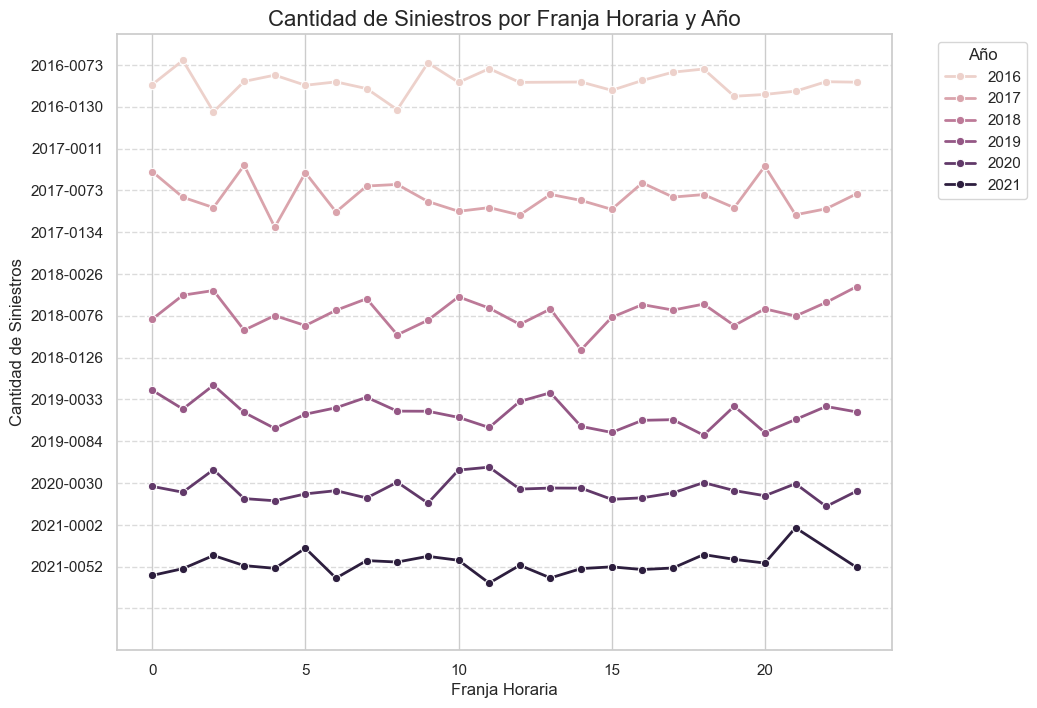

In [245]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="viridis")

# Gráfico de líneas
plt.figure(figsize=(10, 8))
sns.lineplot(x='Franja_horaria', y='ID_siniestro', hue='Anio', data=df_homicidios, marker='o', linewidth=2, ci=None)

# Título y etiquetas
plt.title('Cantidad de Siniestros por Franja Horaria y Año', fontsize=16)
plt.xlabel('Franja Horaria', fontsize=12)
plt.ylabel('Cantidad de Siniestros', fontsize=12)

# Añadir leyenda
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Limitar el rango en el eje y para mejorar la visualización
plt.yticks([50,100,150,200,250,300,350,400,450,500,550,600,650,700,750])
# Mostrar el gráfico
plt.show()


* No se visualiza una franja horaria en la que suceda más (o menos) siniestros viales, lo que se puede interpretar es que parece haber una cierta estabilidad en la mayoría de los años a partir de las 16, 17 y 18 horas (4,5,6 de la tarde).

**Siniestros según tipo de calle por año**

Variables: ID_siniestro, Tipo_calle, Anio

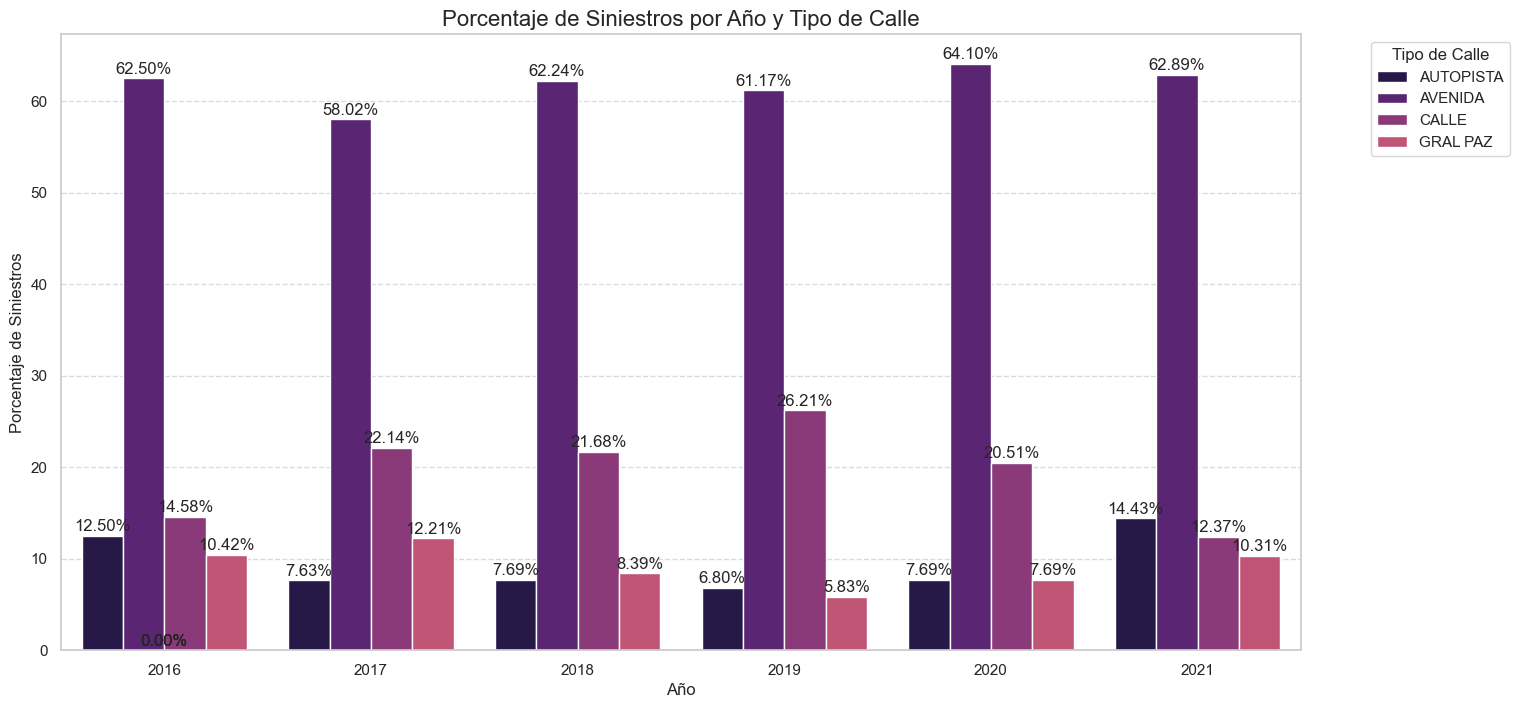

In [252]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="magma")

# Agrupa por año y tipo_calle, cuenta la cantidad de ID_siniestro únicos
conteo_por_ano_y_tipo_calle = df_homicidios.groupby(['Anio', 'Tipo_calle'])['ID_siniestro'].nunique().reset_index()

# Calcula el porcentaje
conteo_por_ano_y_tipo_calle['Porcentaje'] = (conteo_por_ano_y_tipo_calle['ID_siniestro'] / conteo_por_ano_y_tipo_calle.groupby('Anio')['ID_siniestro'].transform('sum')) * 100

# Gráfico de barras
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Anio', y='Porcentaje', hue='Tipo_calle', data=conteo_por_ano_y_tipo_calle)

# Añadir porcentajes encima de las barras y centrados
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.2f}%', ha='center', va='bottom')

# Título y etiquetas
plt.title('Porcentaje de Siniestros por Año y Tipo de Calle', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de Siniestros', fontsize=12)

# Añadir leyenda
plt.legend(title='Tipo de Calle', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

* Claramente se destaca que el tipo de calle donde ocurren la mayoría de los siniestros en todos los años es en "AVENIDAS" (ancho total de por lo menos 13 metros) y menos en "GRAL PAZ" (Avenida General Paz, ambos sentidos. Incluye ingresos y egresos de las mismas). Esta observación sugiere que las avenidas, con su mayor flujo de tráfico y dimensiones amplias, podrían ser áreas de mayor riesgo para incidentes viales. El análisis refuerza la conclusión de que las avenidas son áreas críticas en términos de siniestros viales.

**Siniestros según comuna por año**

Variables: ID_siniestro, Comuna, Anio

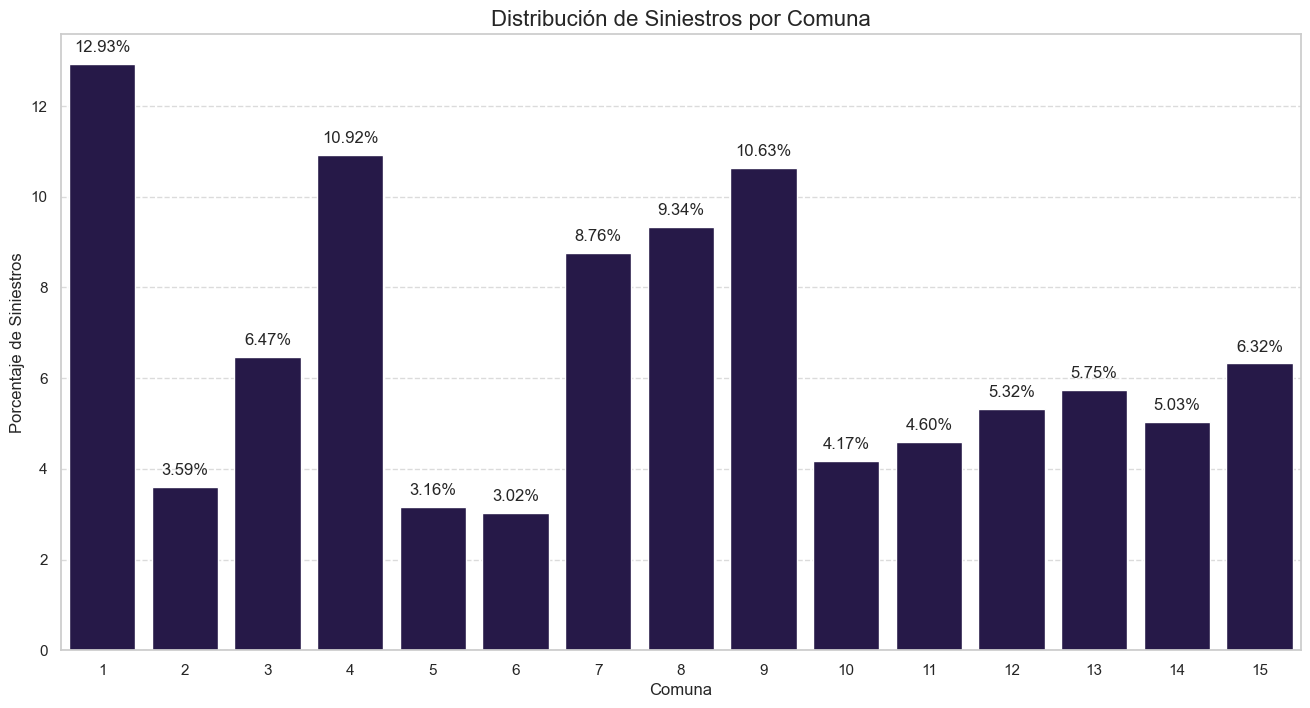

In [258]:
## Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="magma")

# Agrupa por tipo_calle y cuenta la cantidad de ID_siniestro únicos
conteo_por_tipo_calle = df_homicidios.groupby('Comuna')['ID_siniestro'].nunique().reset_index()

# Calcula el porcentaje
conteo_por_tipo_calle['Porcentaje'] = (conteo_por_tipo_calle['ID_siniestro'] / conteo_por_tipo_calle['ID_siniestro'].sum()) * 100

# Gráfico de barras
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Comuna', y='Porcentaje', data=conteo_por_tipo_calle)

# Añadir porcentajes encima de las barras y centrados
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.2f}%', ha='center', va='bottom')

# Título y etiquetas
plt.title('Distribución de Siniestros por Comuna', fontsize=16)
plt.xlabel('Comuna', fontsize=12)
plt.ylabel('Porcentaje de Siniestros', fontsize=12)

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


* Previamente se hizo la gráfica por cada año  se observó que la mayor parte se concentraba en la comuna 1 y 4, por lo que se decidió hacer la gráfica por comuna considerando todos los años para facilitar su visualización. Como resultado tenemos a las comunas 1,4 y 9 en las que suceden la mayoría de los siniestros y las comunas 5 y 6 con menor cantidad. Sugeriría revisar las comunas por tipo de calle

**Siniestros según rol de la víctima por año**

Variables: ID_siniestro, Rol_vehiculo, Anio

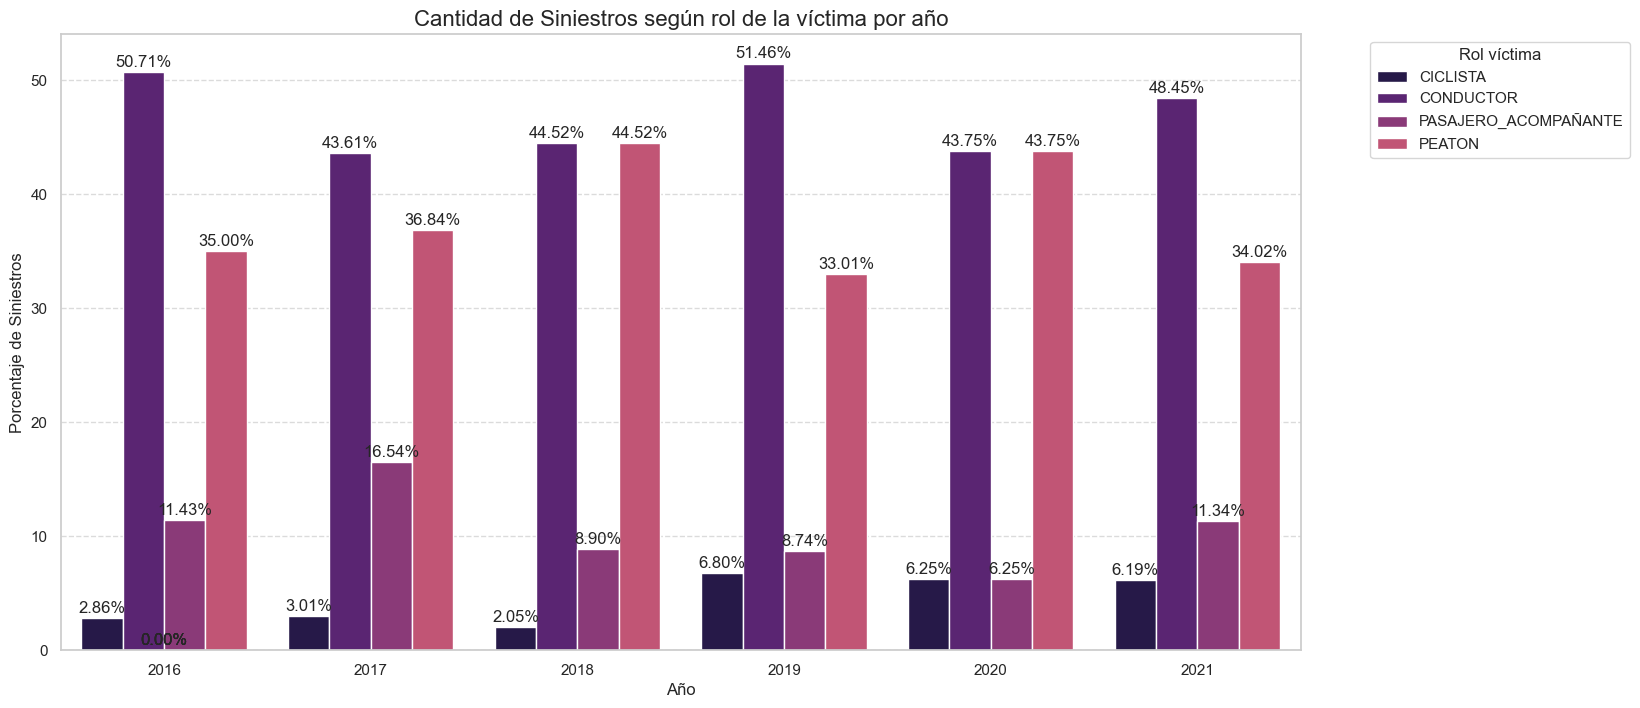

In [263]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="magma")

# Agrupa por año y tipo_calle, cuenta la cantidad de ID_siniestro únicos
conteo_por_ano_y_tipo_calle = df_homicidios.groupby(['Anio', 'Rol_vehiculo'])['ID_siniestro'].nunique().reset_index()

# Calcula el porcentaje
conteo_por_ano_y_tipo_calle['Porcentaje'] = (conteo_por_ano_y_tipo_calle['ID_siniestro'] / conteo_por_ano_y_tipo_calle.groupby('Anio')['ID_siniestro'].transform('sum')) * 100

# Gráfico de barras
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Anio', y='Porcentaje', hue='Rol_vehiculo', data=conteo_por_ano_y_tipo_calle)

# Añadir porcentajes encima de las barras y centrados
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.2f}%', ha='center', va='bottom')

# Título y etiquetas
plt.title('Cantidad de Siniestros según rol de la víctima por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de Siniestros', fontsize=12)

# Añadir leyenda
plt.legend(title='Rol víctima', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

* La gráfica revela que la mayoría de las víctimas de los siniestros viales se encuentran en roles críticos, principalmente como Conductor o Peatón. El término 'Rol' se refiere a la posición relativa al vehículo que presenta la víctima en el momento del siniestro. Esta observación sugiere que tanto los conductores como los peatones son grupos vulnerables en situaciones de siniestros viales. 
* La importancia de esta información resalta la necesidad de implementar medidas específicas de seguridad dirigidas a ambas partes, con el objetivo de reducir la incidencia de siniestros y proteger a ambos grupos en la vía pública. Se sugiere ver la culpabilidad del sinistro para saber si enfocar esfuerzos en el conductor o en el peatón.

**Siniestros según vehículo que ocupaba el acusado del hecho por año**

Variables: ID_siniestro, Vehiculo_Acusado, Anio

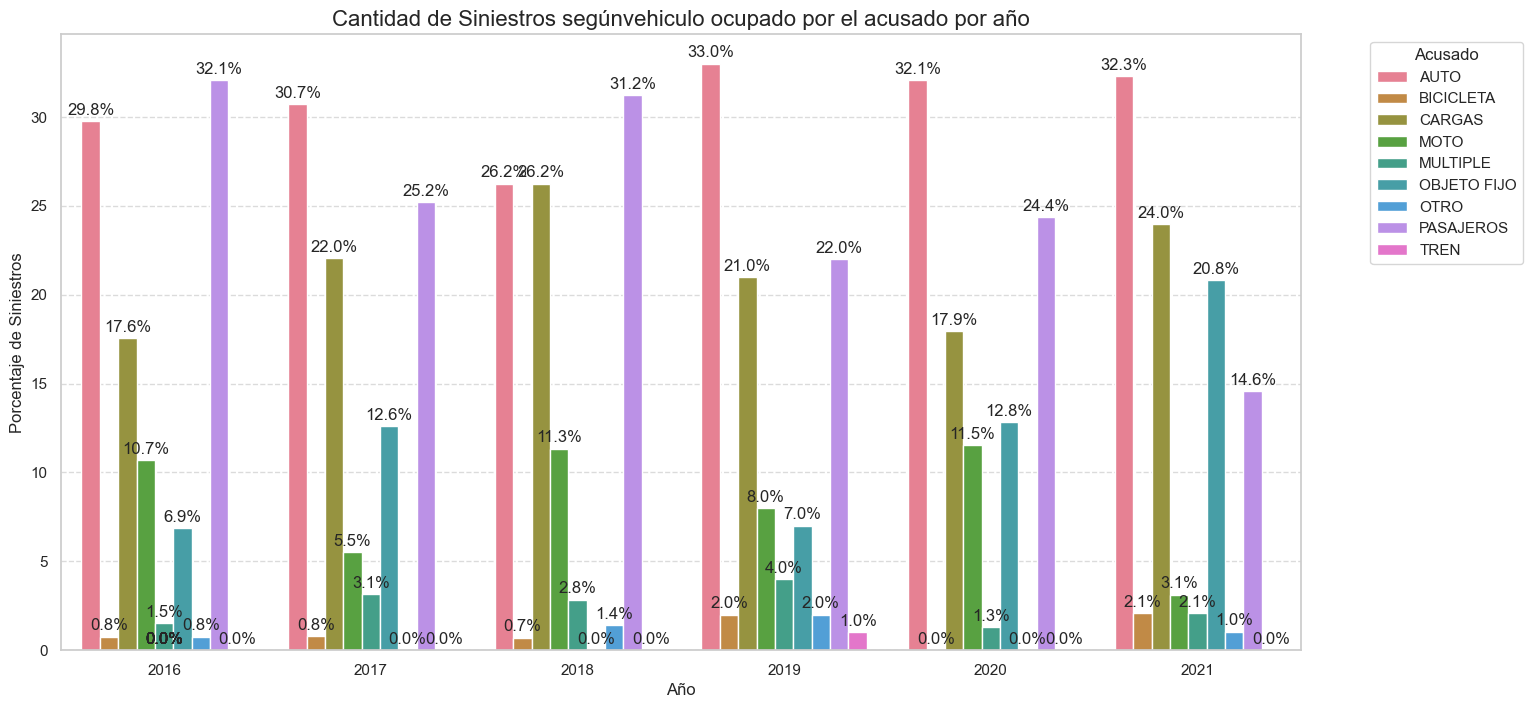

In [268]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="magma")

# Agrupa por año y tipo_calle, cuenta la cantidad de ID_siniestro únicos
conteo_por_ano_y_tipo_calle = df_homicidios.groupby(['Anio', 'Vehiculo_Acusado'])['ID_siniestro'].nunique().reset_index()

# Calcula el porcentaje
conteo_por_ano_y_tipo_calle['Porcentaje'] = (conteo_por_ano_y_tipo_calle['ID_siniestro'] / conteo_por_ano_y_tipo_calle.groupby('Anio')['ID_siniestro'].transform('sum')) * 100

# Gráfico de barras
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Anio', y='Porcentaje', hue='Vehiculo_Acusado', data=conteo_por_ano_y_tipo_calle)

# Añadir porcentajes encima de las barras y centrados
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.1f}%', ha='center', va='bottom')

# Título y etiquetas
plt.title('Cantidad de Siniestros segúnvehiculo ocupado por el acusado por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de Siniestros', fontsize=12)

# Añadir leyenda
plt.legend(title='Acusado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

* La gráfica revela que la mayoría de los siniestros viales involucraron a las categorías de Auto, Pasajeros y Cargas como acusados principales. 
* En el caso de Pasajeros, se refiere a personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de unidades de autotransporte público de pasajeros y ómnibus de larga distancia. Por otro lado, el término Cargas abarca vehículos a motor destinados al transporte de cargas, incluyendo camiones pesados (con o sin acoplado o semirremolque, etc.), así como camiones de recolección de residuos y vehículos livianos como utilitarios, furgonetas, pick-ups y camionetas con caja de carga.
* Hasta este punto se refuerza la importancia de abordar la seguridad vial desde **diversas perspectivas**, considerando tanto a los usuarios de transporte público como a los vehículos destinados al transporte de mercancías. La implementación de estrategias específicas para estos roles podría contribuir a la reducción de siniestros y a la protección de la seguridad de los involucrados."
* Además, alerta que en cierta medida 'Objetos fijo' y 'moto' sean otros acusados en estos siniestros.
* *Se intentó cambiar los colores de la gráfica pero la paleta no se aplicó correctamente 

**Siniestros según vehículo que ocupaba quien falleció por el hecho por año**

Variables: ID_siniestro, Vehiculo_Victima, Anio

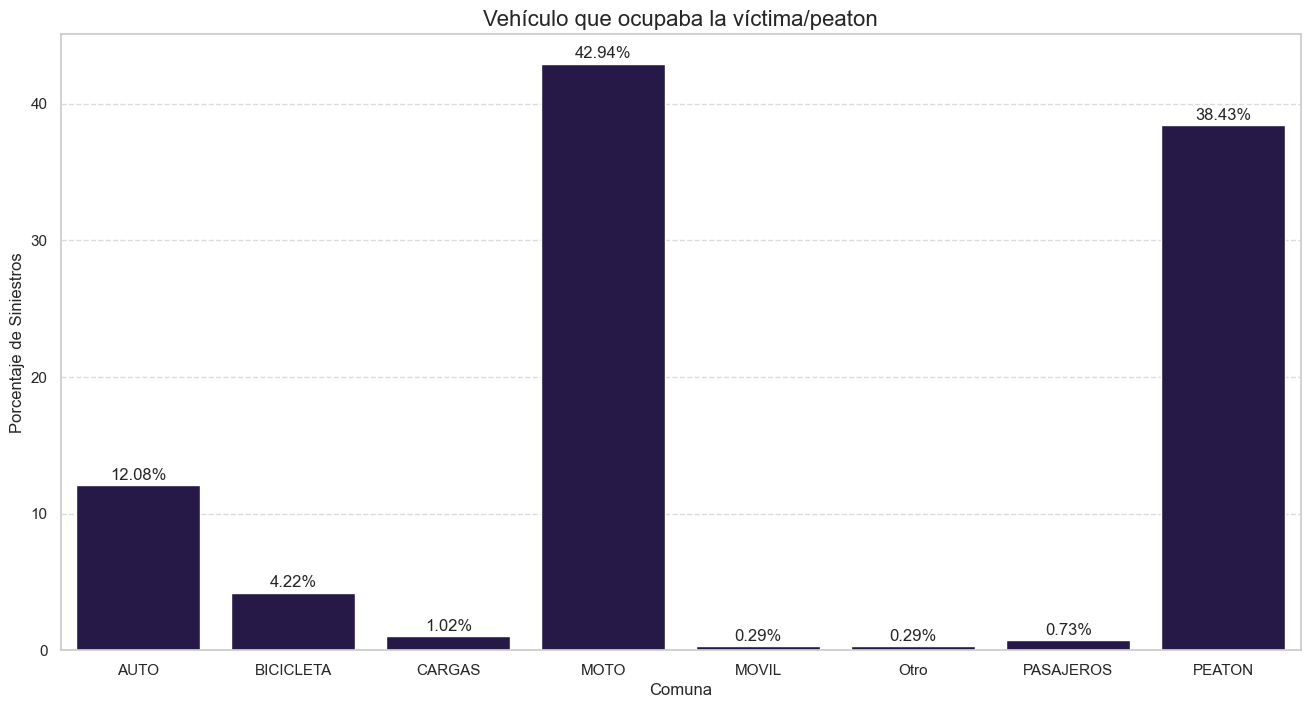

In [284]:
## Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="magma")

# Agrupa por tipo_calle y cuenta la cantidad de ID_siniestro únicos
conteo_por_tipo_calle = df_homicidios.groupby('Vehiculo_Victima')['ID_siniestro'].nunique().reset_index()

# Calcula el porcentaje
conteo_por_tipo_calle['Porcentaje'] = (conteo_por_tipo_calle['ID_siniestro'] / conteo_por_tipo_calle['ID_siniestro'].sum()) * 100

# Gráfico de barras
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Vehiculo_Victima', y='Porcentaje', data=conteo_por_tipo_calle)

# Añadir porcentajes encima de las barras y centrados
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.2f}%', ha='center', va='bottom')

# Título y etiquetas
plt.title('Vehículo que ocupaba la víctima/peaton', fontsize=16)
plt.xlabel('Comuna', fontsize=12)
plt.ylabel('Porcentaje de Siniestros', fontsize=12)

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

* Previamente se hizo la gráfica por cada año se observó que la mayor parte se concentraba claramente en Moto y Peaton y se repetia el patrón por año, por lo que se decidió hacer la gráfica considerando todos los años para facilitar su visualización. 
* El análisis identifica a las categorías de 'Moto' y 'Peatón' como las principales víctimas fatales en incidentes viales. Es alarmante que más del 80% de las víctimas sean tanto peatones como conductores de motocicletas.

**Siniestros según Género del acusado**

Variables: ID_siniestro, Vehiculo_Acusado, Sexo

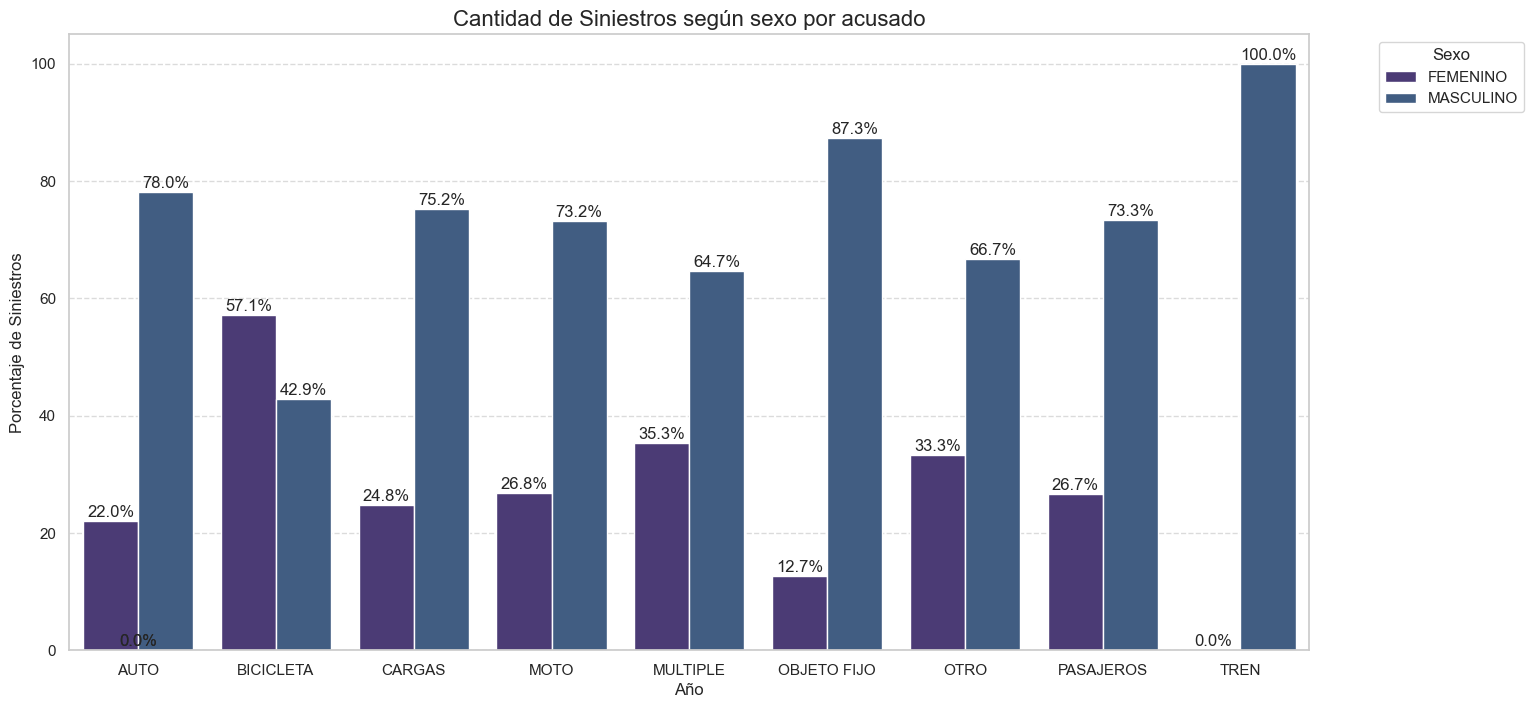

In [291]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid", palette="viridis")

# Agrupa por año y tipo_calle, cuenta la cantidad de ID_siniestro únicos
conteo_por_ano_y_tipo_calle = df_homicidios.groupby(['Vehiculo_Acusado', 'Sexo'])['ID_siniestro'].nunique().reset_index()

# Calcula el porcentaje
conteo_por_ano_y_tipo_calle['Porcentaje'] = (conteo_por_ano_y_tipo_calle['ID_siniestro'] / conteo_por_ano_y_tipo_calle.groupby('Vehiculo_Acusado')['ID_siniestro'].transform('sum')) * 100

# Gráfico de barras
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Vehiculo_Acusado', y='Porcentaje', hue='Sexo', data=conteo_por_ano_y_tipo_calle)

# Añadir porcentajes encima de las barras y centrados
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.1f}%', ha='center', va='bottom')

# Título y etiquetas
plt.title('Cantidad de Siniestros según sexo por acusado', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de Siniestros', fontsize=12)

# Añadir leyenda
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Personalizar el estilo de las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

* Es notoria la diferencia del género de los acusados, en su mayoría son del género masculino, pero en cuanto a las bicicletas es mayor para el género femenino.

**Distribución de Siniestros en la Ciudad Autónoma de Buenos Aires** 

Se usa la libreria folium (librería para visualización eoespacial), revisar [documentación](https://python-visualization.github.io/folium/latest/) para mayor información.

In [298]:
import folium
from folium.plugins import MarkerCluster

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[df_homicidios['Latitud'].mean(), df_homicidios['Longitud'].mean()], zoom_start=12)

# Crear un grupo de marcadores para agrupar siniestros cercanos
cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con información del ID_siniestro
for index, row in df_homicidios.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], popup=f"ID_siniestro: {row['ID_siniestro']}").add_to(cluster)

# Guardar el mapa como un archivo HTML
mapa.save("mapa_siniestros.html")
mapa

### 2.2 Análisis - dataframe lesiones

In [3]:
df_lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27602 entries, 0 to 27601
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_siniestro        27602 non-null  object 
 1   Nro_victimas        27602 non-null  int64  
 2   Fecha               27602 non-null  object 
 3   Franja_horaria      27593 non-null  float64
 4   Comuna              25975 non-null  float64
 5   Tipo_calle          14720 non-null  object 
 6   Longitud            25943 non-null  float64
 7   Latitud             25943 non-null  float64
 8   Vehiculo_Victima    14778 non-null  object 
 9   Vehiculo_Acusado    9682 non-null   object 
 10  moto                17354 non-null  float64
 11  auto                12943 non-null  float64
 12  transporte_publico  13968 non-null  float64
 13  camion              12752 non-null  float64
 14  ciclista            14140 non-null  float64
 15  gravedad            27602 non-null  object 
 16  Sexo

Hacemos la conversión de las variables ya que las variables no responden a la naturaleza de lo que representan. 


In [4]:
#Corrección necesaria
df_lesiones.loc[df_lesiones['ID_siniestro'] == "LC-2020-0244615", 'Fecha'] = "2020-05-17 00:00:00"

In [5]:
df_lesiones['Fecha'] = pd.to_datetime(df_lesiones['Fecha'])
df_lesiones['Franja_horaria'] = pd.to_numeric(df_lesiones['Franja_horaria'], errors='coerce').astype('Int64')
df_lesiones['Edad'] = pd.to_numeric(df_lesiones['Edad'], errors='coerce').astype('Int64')
df_lesiones['Tipo_calle'] = df_lesiones['Tipo_calle'].astype('category')
df_lesiones['Comuna'] = df_lesiones['Comuna'].astype('category')
df_lesiones['Vehiculo_Victima'] =df_lesiones['Vehiculo_Victima'].astype('category')
df_lesiones['Vehiculo_Acusado'] =df_lesiones['Vehiculo_Acusado'].astype('category')
df_lesiones['Sexo'] =df_lesiones['Sexo'].astype('category')
df_lesiones['gravedad'] =df_lesiones['gravedad'].astype('category')

#### a) Valores faltantes o nulos - Lesiones

In [6]:
# Lesiones

nulos_por_columna = df_lesiones.isnull().sum()
porcentaje_nulos_por_columna = (nulos_por_columna / len(df_lesiones)) * 100

df_info_nulos = pd.DataFrame({
    'Nulos': nulos_por_columna,
    'Total': len(df_lesiones),'% Nulos': round(porcentaje_nulos_por_columna,2)
})
df_info_nulos

,Nulos,Total,% Nulos
ID_siniestro,0,27602,0.00
Nro_victimas,0,27602,0.00
Fecha,0,27602,0.00
Franja_horaria,9,27602,0.03
Comuna,1627,27602,5.89
Tipo_calle,12882,27602,46.67
Longitud,1659,27602,6.01
Latitud,1659,27602,6.01
Vehiculo_Victima,12824,27602,46.46
Vehiculo_Acusado,17920,27602,64.92


La presencia de nulos en el dataframe es elevado para algunas columnas con hasta más del 50% de representatividad de todo el dataframe. Veamos en una gráfica para mejor entendimiento.

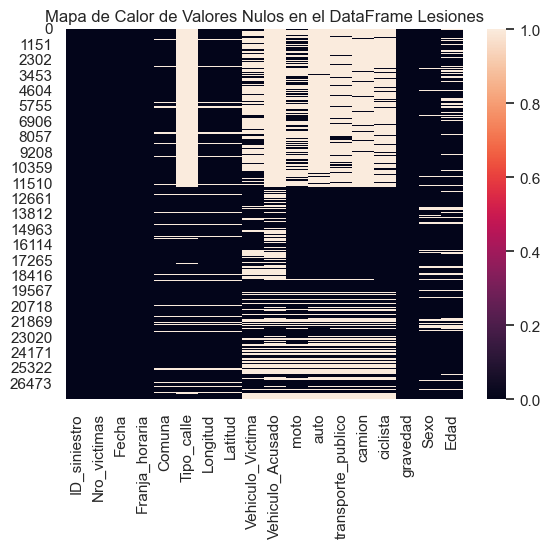

In [338]:
sns.heatmap(df_lesiones.isnull())
plt.title('Mapa de Calor de Valores Nulos en el DataFrame Lesiones')
plt.show()

In [7]:
df_lesiones1=df_lesiones.copy()

#### b) Registros duplicados - Homicidios

In [11]:
# Identificar las filas duplicadas basadas en todas las columnas
duplicados = df_lesiones1[df_lesiones1.duplicated(keep='first', subset=None)]
print("Hay",duplicados.shape[0],"filas completas duplicadas")
df_lesiones1[df_lesiones1['ID_siniestro']=='LC-2019-0006638'] # Filas duplicadas en base Lesiones -Victimas

Hay 639 filas completas duplicadas


,ID_siniestro,Nro_victimas,Fecha,Franja_horaria,Comuna,Tipo_calle,Longitud,Latitud,Vehiculo_Victima,Vehiculo_Acusado,moto,auto,transporte_publico,camion,ciclista,gravedad,Sexo,Edad
78,LC-2019-0006638,2,2019-01-04,9,10.0,NaN,-58.496239,-34.636075,MOTO,NaN,1.0,NaN,NaN,NaN,NaN,LEVE,MASCULINO,37
79,LC-2019-0006638,2,2019-01-04,9,10.0,NaN,-58.496239,-34.636075,MOTO,NaN,1.0,NaN,NaN,NaN,NaN,LEVE,MASCULINO,37


In [13]:
# Eliminar filas duplicadas manteniendo la primera aparición directamente en el mismo DataFrame
df_lesiones1.drop_duplicates(keep='first', inplace=True)
#(26963, 18)


In [15]:
# Exportamos para su uso en el Dashboard
df_lesiones1.to_csv('lesiones_final_sinduplicados.csv', index=False)